# Hand Gesture Recognition Model


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

# Define the path to the dataset in Google Drive
dataset_path = '/content/drive/My Drive/archive.zip'
extract_path = '/content/hand_gestures/'

In [3]:
# Extract the dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
# Verify extraction
print(f"Number of directories in the dataset: {len(os.listdir(extract_path))}")

Number of directories in the dataset: 2


In [5]:
import numpy as np
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [6]:
# Define image dimensions
IMG_SIZE = 64

def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return img

In [7]:
# Create a dataframe with image paths and labels
data = []
labels = []

for dirpath, dirnames, filenames in os.walk(extract_path):
    for file in filenames:
        if file.endswith('.png'):
            file_path = os.path.join(dirpath, file)
            label = os.path.basename(os.path.dirname(file_path))
            data.append(file_path)
            labels.append(label)


In [8]:
# Convert to dataframe
df = pd.DataFrame({'image_path': data, 'label': labels})

In [14]:
# Encode labels
df['label'] = pd.Categorical(df['label']).codes.astype(str)

In [15]:
# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

## Model Training

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [17]:
# Prepare data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=32
)

Found 32000 validated image filenames belonging to 10 classes.
Found 8000 validated image filenames belonging to 10 classes.


In [18]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(df['label'].unique()), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Train the model
model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 250s 247ms/step - loss: 0.2345 - accuracy: 0.9246 - val_loss: 0.0036 - val_accuracy: 0.9992
Epoch 2/10
1000/1000 [==============================] - 240s 240ms/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.0014 - val_accuracy: 0.9996
Epoch 3/10
1000/1000 [==============================] - 270s 270ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 2.8616e-04 - val_accuracy: 0.9999
Epoch 4/10
1000/1000 [==============================] - 241s 241ms/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 4.7737e-04 - val_accuracy: 0.9999
Epoch 5/10
1000/1000 [==============================] - 248s 248ms/step - loss: 0.0100 - accuracy: 0.9966 - val_loss: 8.4229e-05 - val_accuracy: 1.0000
Epoch 6/10
1000/1000 [==============================] - 242s 242ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 1.8212e-04 - val_accuracy: 0.9999
Epoch 7/10
1000/1000 [==============================] - 242s 242ms/step - loss: 0.0077 - accurac

## Evaluation and Testing

In [20]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

250/250 [==============================] - 28s 110ms/step - loss: 2.0888e-04 - accuracy: 0.9999
Test Accuracy: 99.99%


In [25]:
gesture_labels = {
    0: 'Swipe Left',
    1: 'Swipe Right',
    2: 'Thumb Up',
    3: 'Thumb Down',
    4: 'Zoom In',
    5: 'Zoom Out',
    6: 'Shake Hand',
    7: 'Wave Hand',
    8: 'Stop',
    9: 'Fist'
}


In [26]:
# Function to classify random images
import random
import matplotlib.pyplot as plt

def classify_random_images(num_images=3):
    random_indices = random.sample(range(len(test_df)), num_images)
    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(random_indices):
        img_path = test_df.iloc[idx]['image_path']
        img = preprocess_image(img_path)
        img = np.expand_dims(img, axis=0)
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction)

        # Display the image with the predicted label
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Predicted: {predicted_label}')
        plt.axis('off')

    plt.show()

1/1 [==============================] - 0s 35ms/step


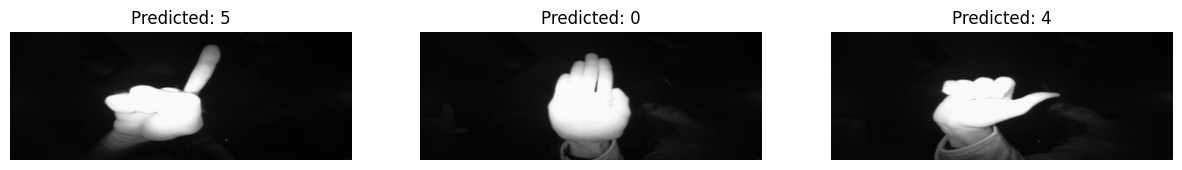

In [32]:
# Example usage
classify_random_images(num_images=3)

1/1 [==============================] - 0s 22ms/step


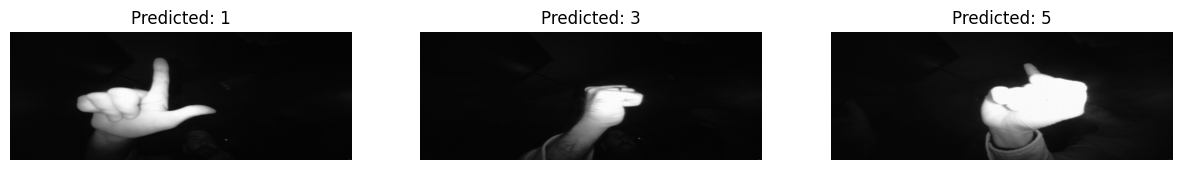

In [36]:
# Example usage
classify_random_images(num_images=3)

1/1 [==============================] - 0s 34ms/step


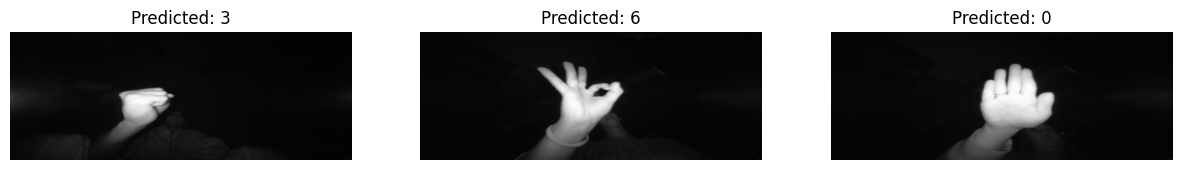

In [42]:
# Example usage
classify_random_images(num_images=3)